In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


- 변수가 많기 때문에 주택가격과 상관계수가 0.3이상인 애들만 추려보자

In [38]:
cormat=df.corr()
columns=cormat.index[abs(cormat['price'])>=0.3]


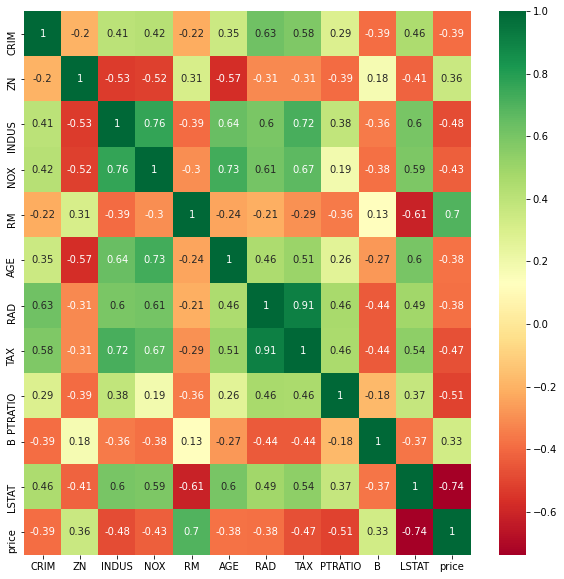

In [20]:
plt.figure(figsize=(10,10))
heat = sns.heatmap(df[columns].corr(), annot=True, cmap='RdYlGn')

- 우선적으로 price에 상관계수가 가장 큰 2개 만 뽑아서 단순선형회귀를 해보자

In [40]:
abs(cormat['price']).sort_values(ascending=True) # lstat, rm을 변수로 단순선형회귀 ㄱㄱ

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
price      1.000000
Name: price, dtype: float64

- lstat, rm열 데이터 가공

In [44]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [52]:
df2 = df[['RM','LSTAT','price']] # 표준화필요
df2

,RM,LSTAT,price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


Text(0.5, 0, 'price')

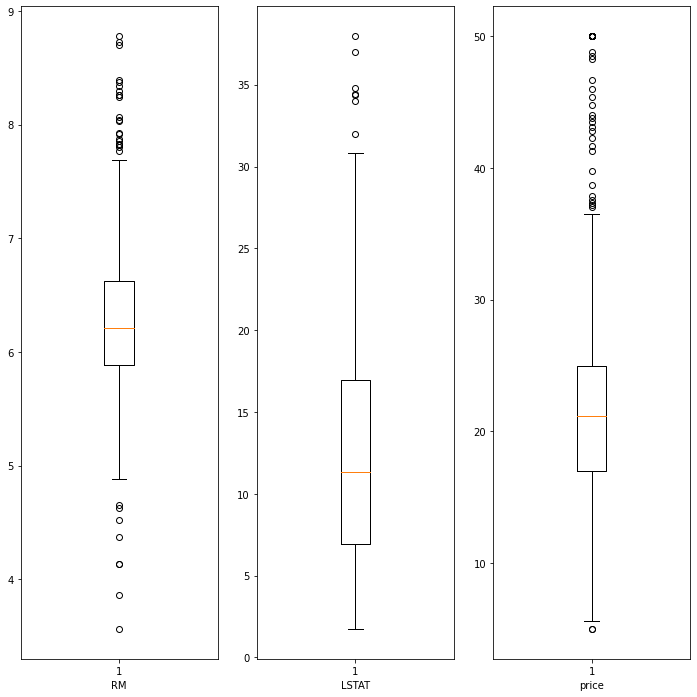

In [67]:
plt.figure(figsize=(12,12)) #이상치 최소화 해주는 robustscaler도 써보자
plt.subplot(131)
plt.boxplot(df2.RM)
plt.xlabel('RM')
plt.subplot(132)
plt.boxplot(df2.LSTAT)
plt.xlabel('LSTAT')
plt.subplot(133)
plt.boxplot(df2.price)
plt.xlabel('price')

- train, test data set #우선적으로 RM 단순선형회귀

In [91]:
df2.RM.values.reshape(-1,1)

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [96]:
X=df2.RM.values.reshape(-1,1) ## 단순 변수 일때 data shape를 바꿔줘야함
y=df2.price

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)

In [94]:
X_train.shape, X_test.shape

((354, 1), (152, 1))

- 표준화

In [95]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)


- 선형회귀 모델 ㄱㄱ

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test) # ㅎㄷㄷ 정확도 개구림

0.40439799486092687

- 정규화 해보자

In [100]:
from sklearn.preprocessing import MinMaxScaler
mms =   MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.fit_transform(X_test)